In [1]:
import os
import bops
import pandas as pd

osimModelPath, GeometryFolder = bops.torsion_tool()
print(osimModelPath)


    

c:\Git\msk_modelling_python\bops.py
c:\models\subject\subject_model.osim


In [ ]:

data_dir = r'C:\Git\Uni_teaching\BD2II - Biomechanical Motion Analysis in Practice (2023S)\lab3-EMG'

bops.add_each_c3d_to_own_folder(data_dir)

trial_list = [f.name for f in os.scandir(data_dir) if f.is_dir()]
trial_list = [s for s in trial_list if 'static' not in s]

emg_labels = ['EMG Channels.EMG16_left_tens_fasc_lat']

# set filter parameters
fs = 1000  # sample rate, Hz
band_lowcut = 10  # lower cut-off frequency, Hz
lowcut = 6  # lower cut-off frequency, Hz
band_highcut = 50  # upper cut-off frequency, Hz
order = 4  # filter order

trial = trial_list [0]
trial_folder = os.path.join(data_dir, trial)
c3dpath = os.path.join(trial_folder, 'c3dfile.c3d')
emgpath = os.path.join(trial_folder, 'emg.csv')
# bops.c3d_osim_export(c3dpath)
# bops.c3d_emg_export(c3dpath,emg_labels)

emg_data = pd.read_csv(emgpath)
emg_data_filtered = bops.emg_filter(emg_data, band_lowcut, band_highcut, lowcut, fs, order)
emg_filename = os.path.join(trial_folder,'emg_filtered.csv')
emg_data_filtered.to_csv(emg_filename)
    
    

In [69]:
# python version of Batch Opensim Processing Software
import os
import shutil
import opensim as osim
from xml.etree import ElementTree as ET
import numpy as np
import pyc3dserver as c3d
import pandas as pd
import scipy.signal as sig
import matplotlib.pyplot as plt

fs = 1000  # sample rate, Hz
band_lowcut = 10  # lower cut-off frequency, Hz
lowcut = 2  # lower cut-off frequency, Hz
band_highcut = 50  # upper cut-off frequency, Hz
order = 2  # filter order

emg_data = pd.read_csv(emgpath,index_col=0)
df = emg_data



AttributeError: module 'bops' has no attribute 'torsion_tool'

121.60817218514765


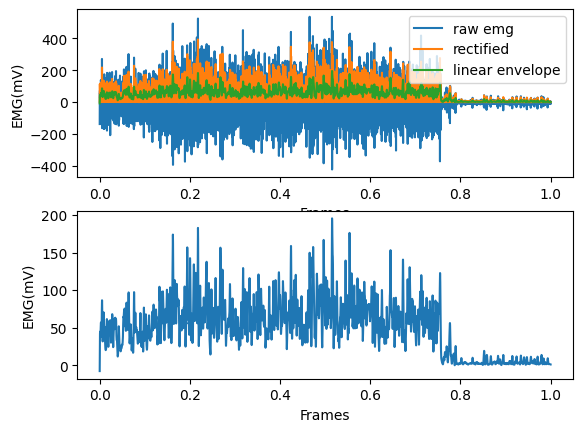

In [67]:

nyq = 0.5 * fs
normal_cutoff  = band_lowcut / nyq
b_low, a_low = sig.butter(order, normal_cutoff, btype='low',analog=False)

low = band_lowcut / nyq
high = band_highcut / nyq
b_band, a_band = sig.butter(order, [low, high], btype='band')

time = np.linspace(0, 1, len(df))

for col in df.columns:
    raw_emg_signal = df[col]
    bandpass_signal = sig.filtfilt(b_band, a_band, raw_emg_signal)   
    detrend_signal = sig.detrend(bandpass_signal, type='linear')
    rectified_signal = np.abs(detrend_signal)
    linear_envelope = sig.filtfilt(b_low, a_low, rectified_signal)
    print(col)
    df = df.drop(col,  axis=1)
    df[col] = linear_envelope
    
rolling_average = pd.Series(linear_envelope).rolling(200, min_periods=1).mean()
max_average = np.max(rolling_average)
print(max_average)

fig = plt.figure()
ax = fig.add_axes(211)
ax.plot(time, raw_emg_signal, label='raw emg')
ax.plot(time, rectified_signal, label='rectified')
# ax.plot(time, bandpass_signal, label='bandpass')
ax.plot(time, linear_envelope, label='linear envelope')
ax.set_ylabel('EMG(mV)')
ax.set_xlabel('Frames')
ax.legend(loc='upper right')

ax2 = fig.add_axes(212)
ax2.plot(time, linear_envelope)
ax2.set_ylabel('EMG(mV)')
ax2.set_xlabel('Frames')

plt.show()


In [68]:
import os
import bops
import pandas as pd
import numpy as np

data_dir = r'C:\Git\Uni_teaching\BD2II - Biomechanical Motion Analysis in Practice (2023S)\lab3-EMG'

bops.add_each_c3d_to_own_folder(data_dir)

trial_list = [f.name for f in os.scandir(data_dir) if f.is_dir()]
trial_list = [s for s in trial_list if 'static' not in s]

emg_labels = ['EMG Channels.EMG16_left_tens_fasc_lat']

# set filter parameters
fs = 1000.0  # sample rate, Hz
lowcut = 10.0  # lower cut-off frequency, Hz
lowcut_2 = 6.0  # lower cut-off frequency, Hz
highcut = 50.0  # upper cut-off frequency, Hz
order = 4  # filter order

mean_emg = []

for trial in trial_list:
    # file directories
    trial_folder = os.path.join(data_dir, trial)
    
    c3dpath = os.path.join(trial_folder, 'c3dfile.c3d')
    emgpath = os.path.join(trial_folder, 'emg.csv')
    if not os.path.isfile(c3dpath):
        try:
            bops.c3d_osim_export(c3dpath)
        except:
            print('could not convert ' + c3dpath + ' to markers and grf') 
    
    if not os.path.isfile(emgpath):
        try: 
            bops.c3d_emg_export(c3dpath,emg_labels)
        except:
            print('could not convert ' + c3dpath + ' to emg.csv') 
    
    emg_data = pd.read_csv(emgpath, index_col=0)
    emg_data_filtered = bops.emg_filter(emg_data, lowcut, highcut, lowcut_2, fs, order)
    emg_filename = os.path.join(trial_folder,'emg_filtered.csv')
    emg_data_filtered.to_csv(emg_filename)
    
    
    for col in emg_data_filtered.columns:
        max_rolling_average = np.max(pd.Series(emg_data_filtered[col]).rolling(200, min_periods=1).mean())
        mean_emg.append(max_rolling_average)
    

print(mean_emg)
    
    

[]
